In [1]:
# Competition Titanic on Kaggle (for beginners)

# BUT : prédire qui va survivre et qui va mourir
# 3 datasets (train, test, gender_submission)

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt
%matplotlib inline

df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [2]:
display(df_train.head(5), df_test.head(5))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df_test.isna().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [5]:
print("train :", df_train.duplicated().sum())
print("test :", df_test.duplicated().sum())

train : 0
test : 0


In [6]:
# on peut voir dans test que seul "survived" a été enlevé

# il y a des NaN, je veux savoir à quelle proportion du df ça correspond dans train et dans test
print("train :")
df_train.info()
df_train.describe()

print("test :")
df_test.info()
df_test.describe()

train :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
test :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64 

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
# TRAIN : 891 entrées / +600 NaN dans cabin / 177 NaN dans age / pas de doublons
#
# TEST : 418 entrées / +300 Nan dans cabin / 86 NaN dans age / pas de doublons

# dans un premier temps, je fais sauter la colonne cabin car elle comprend trop de NaN et je ne peux pas les remplacer par une
# quelconque valeur, ainsi que Name et Ticket
df_train = df_train.drop(["Cabin", "Name", "Ticket"], axis = 1)
df_test = df_test.drop(["Cabin", "Name", "Ticket"], axis = 1)


In [8]:
display(df_train.head(5))
display(df_test.head(5))

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [9]:
# je modifie en variables numériques les colonnes sex et embarked
dico = {"male":0, "female":1, "S":0, "C":1, "Q":2}

df_train = df_train.replace(dico)
df_test = df_test.replace(dico)

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 62.8 KB


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


<AxesSubplot:>

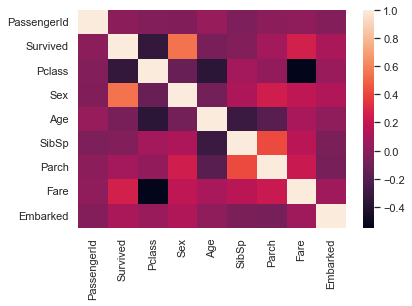

In [11]:
# en ce qui concerne l'âge, je veux voir si ça a une influence avant de faire quoique ce soit
# je vais donc faire une matrice de corrélation heatmap

# TRAIN
df_train_corr = df_train.corr()
sns.heatmap(df_train_corr)

# on peut voir pour TRAIN que Survived est anti-corrélée avec Pclass et Age (donc plus le numéro de la classe est bas, plus survived
# augmente, et plus l'âge est bas, et plus survived augmente) --> logique car 1e classe + prestigieuse que 2e et 3e
# --> et enfants privilégiés lors d'évacuations
# il semblerait en revanche qu'il n'y ait pas de corrélation entre Survived et SibSp, à vérifier

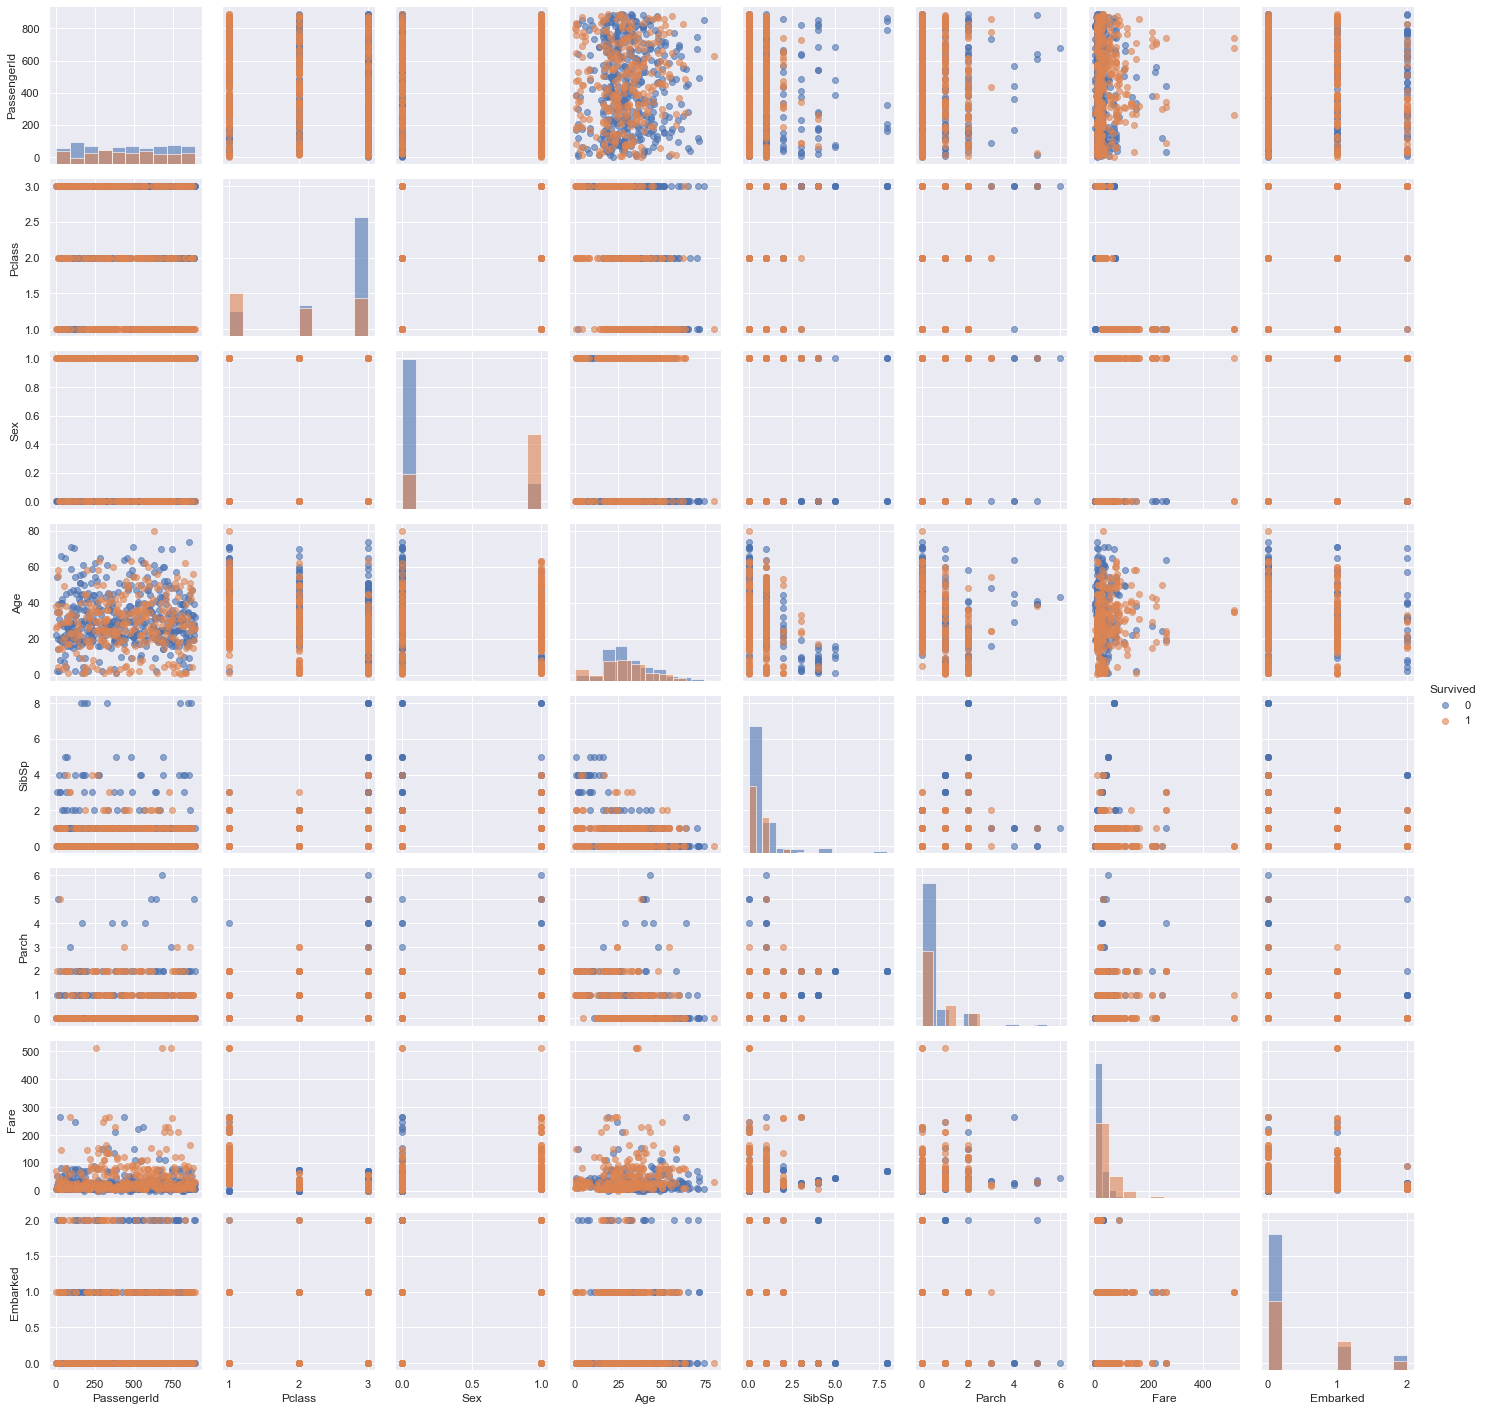

In [12]:
# j'observe les relations entre les variables avec un pairplot
g = sns.PairGrid(df_train, hue = "Survived")
g.map_diag(plt.hist, alpha = 0.6)
g.map_offdiag(plt.scatter, alpha = 0.6)
g.add_legend()

# sur ce pairgrid on remarque :
# que Pclass conditionne énormément l'issue : ratio de survivants positif pour la 1e classe, neutre pour la 2e, négatif +++ pour la 3e
# idem pour Sex : ratio de survivants négatif +++ chez les hommes (0), positif chez les femmes (1)
# idem pour SibSp : plus le passager avait de frères/soeurs/époux/se dans le navire, plus il avait de risque de mourir
# idem parch : plus le passager avait de parents/enfants dans le navire, plus il avait de risque de mourir
# idem fare : plus le prix du ticket était bas, et plus il y avait de risque de mourir
# et embarked : il semble y avoir aussi un lien entre survivant et port d'embarquement. ratio survivant/mort positif pour Cherbourg (1)
# il y a aussi un fort déséquilibre entre le nombre total de survivants qui est beaucoup plus faible que celui des morts

# de plus, j'ai l'impression d'avoir une valeur aberrante à Fare (prix qui monte à 500 ???)

In [13]:
# vérification des valeurs aberrantes de Fare
verif = df_train[df_train["Fare"] > 300]
print(verif)

# ces trois passagers sont en première classe et ont payé le même prix, il faut croire que ce n'est pas une erreur

     PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch      Fare  \
258          259         1       1    1  35.0      0      0  512.3292   
679          680         1       1    0  36.0      0      1  512.3292   
737          738         1       1    0  35.0      0      0  512.3292   

     Embarked  
258       1.0  
679       1.0  
737       1.0  


C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


Text(0.5, 0.98, 'link between chance of surviving and age')

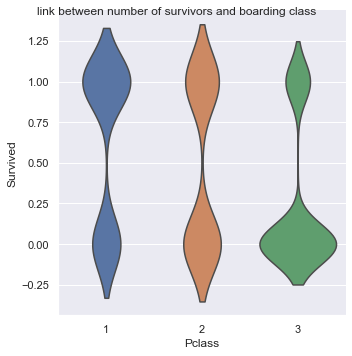

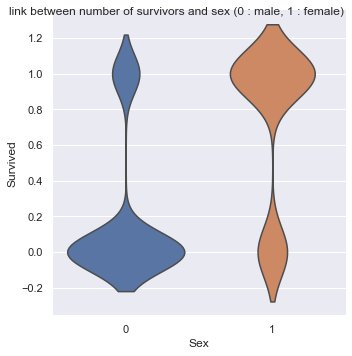

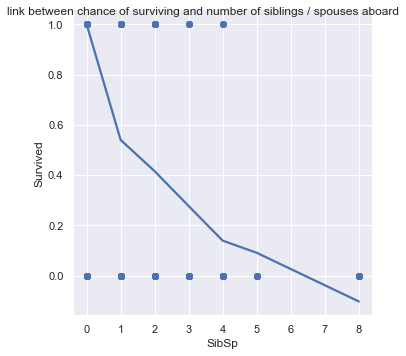

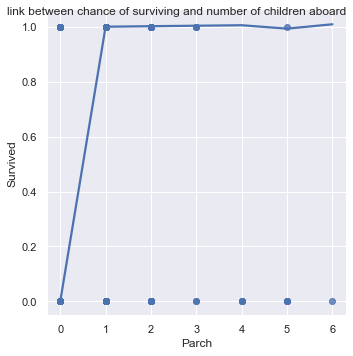

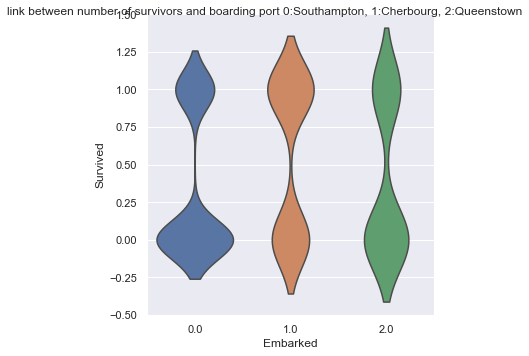

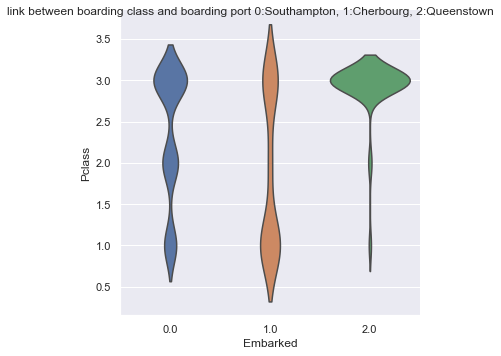

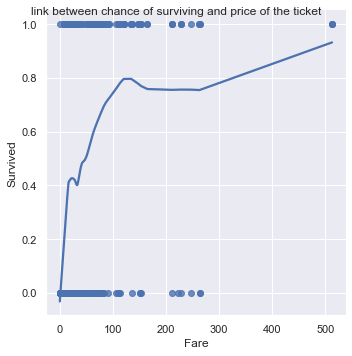

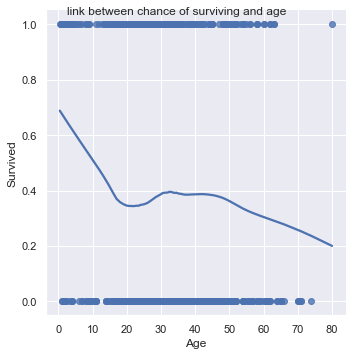

In [14]:
# au vue des résultats du pair grid, je souhaite examiner plus en détail certaines relations entre les données
# j'affiche en détail le rapport survivant en fonction de la classe (lien entre Pclass et Survived)
g1 = sns.catplot(data = df_train, x = "Pclass", y = "Survived", kind = "violin", inner = None)
g1.fig.suptitle("link between number of survivors and boarding class")

# lien entre Sex et Survived
g2 = sns.catplot(data = df_train, x = "Sex", y = "Survived", kind = "violin", inner = None)
g2.fig.suptitle("link between number of survivors and sex (0 : male, 1 : female)")

# lien entre SibSp et Survived
g3 = sns.lmplot(x = "SibSp", y = "Survived", data = df_train, lowess = True)
g3.fig.suptitle("link between chance of surviving and number of siblings / spouses aboard")

# lien entre Parch et Survived
g4 = sns.lmplot(x = "Parch", y = "Survived", data = df_train, lowess = True)
g4.fig.suptitle("link between chance of surviving and number of children aboard")

# lien entre Embarked et Survived
g5 = sns.catplot(data = df_train, x = "Embarked", y = "Survived", kind = "violin", inner = None)
g5.fig.suptitle("link between number of survivors and boarding port 0:Southampton, 1:Cherbourg, 2:Queenstown")
# en fait, il est ici intéressant de voir quelle type de clientèle a embarqué à quel port
g5bis = sns.catplot(data = df_train, x = "Embarked", y = "Pclass", kind = "violin", inner = None)
g5bis.fig.suptitle("link between boarding class and boarding port 0:Southampton, 1:Cherbourg, 2:Queenstown")

# lien entre Fare et Survived
g6 = sns.lmplot(x = "Fare", y = "Survived", data = df_train, lowess = True)
g6.fig.suptitle("link between chance of surviving and price of the ticket")

# lien entre Age et Survived
g7 = sns.lmplot(x = "Age", y = "Survived", data = df_train, lowess = True)
g7.fig.suptitle("link between chance of surviving and age")

In [15]:
### INTERPRETATION DES GRAPHIQUES ###

# on remarque que ce qui favorise les chances de survie sont :
    # la 1e classe
    # être une femme ayant entre 0 et 15 ans, et entre 30 et 50 ans (et avoir IMPERATIVEMENT un enfant < 15 ans)
    # être un enfant < 15 ans
    # être seul ou accompagné d'un seul frère/soeur/époux(se)
    # avoir embarqué à Cherbourg
    # avoir payé son ticket plus de 100 dollars

# conclusion assez généralisée : pour avoir le maximum de chances de survie il faut être un enfant < 15 ans sans ou avec un seul
# frère/soeur ou une femme entre 30 et 50 ans et ayant au moins un enfant, 
# avoir embarqué à Cherbourg en 1e classe avec un ticket valant 100 $ et +


0    0.616162
1    0.383838
Name: Survived, dtype: float64


C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


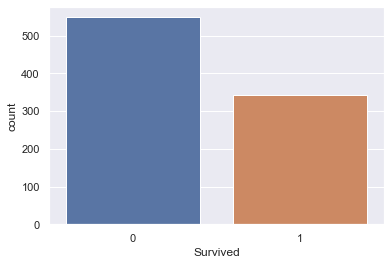

In [16]:
# DATA VIZ
# je souhaite connaître la proportion de Survived dans train car si déséquilibré : besoin d'un over/under sampling
sns.countplot(df_train["Survived"])

print(df_train["Survived"].value_counts(normalize = True))

In [17]:
# jeu de données déséquilibré : avec un algorithme standard on aurait une accuracy de seulement 38%
# il va falloir rééquilibrer les données

In [18]:
# pour âge : 177*100/891 = 19,8 % des données soit 1 cinquième ce qui n'est pas négligeable.
# Je ne peux pas supprimer cette variable car on perdrait trop de données
# je remplace les NaN de âge avec la valeur précédente (j'ai peur que la moyenne des âges uniformise trop les données)

df_train = df_train.fillna(method = "ffill")
df_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [19]:
# il faut aussi que je modifie les NaN de df_test["Age"]
# j'utilise la même méthode que pour train pour éviter de trop uniformiser les données
df_test = df_test.fillna(method = "ffill")
df_test.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [20]:
# je sépare X_train, X_test, y_train, y_test 
features = df_train.drop("Survived", axis = 1)
target = df_train["Survived"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 123)

# je vérifie les dimensions car scikit-learn ne veut que des 2D de la forme (xx,1) et non pas (xx,)
print("dimensions de X_train :", X_train.shape)
print("dimensions de X_test :", X_test.shape)
print("dimensions de y_train :", y_train.shape)
print("dimensions de y_test :", y_test.shape)


dimensions de X_train : (712, 8)
dimensions de X_test : (179, 8)
dimensions de y_train : (712,)
dimensions de y_test : (179,)


In [21]:

# je modifie les dimensions de y_train et y_test pour être conforme avec scikit-learn
# pour cela, je change tout en array
X_train_array = X_train.to_numpy()
X_test_array = X_test.to_numpy()
y_train_array = y_train.to_numpy()
y_test_array = y_test.to_numpy()

# puis j'effectue le redimensionnement
y_train_array = y_train_array.reshape((len(y_train_array),1))
y_test_array = y_test_array.reshape((len(y_test_array),1))

print("dimensions de X_train_array :", X_train_array.shape)
print("dimensions de X_test_array :", X_test_array.shape)
print("dimensions de y_train_array :", y_train_array.shape)
print("dimensions de y_test_array :", y_test_array.shape)

dimensions de X_train_array : (712, 8)
dimensions de X_test_array : (179, 8)
dimensions de y_train_array : (712, 1)
dimensions de y_test_array : (179, 1)


In [23]:
# il s'agit de classifier les passagers en fonction de s'ils vont survivre ou pas
# je fais un voting classifier avec régression logistique, KNN, random forest

# je commence par chercher les meilleurs paramètres

# grid search cv + over sampling
from imblearn.over_sampling import RandomOverSampler
ros1 = RandomOverSampler()
X_train_ros1, y_train_ros1 = ros1.fit_resample(X_train_array, y_train_array)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, KFold, cross_validate

# logistic regression
logreg = LogisticRegression(max_iter = 1000)
params_logreg = {"C":[1, 10, 100], "solver":["liblinear","lbfgs"]}

# random forest
rf = RandomForestClassifier(random_state = 123)
params_rf = {"criterion":["entropy", "gini"]}

# K Nearest Neighbors
knn = KNeighborsClassifier()
params_knn = {"n_neighbors":[2,5,10], "weights":["uniform", "distance"], "metric":["minkowski", "euclidean", "manhattan"]}

def find_best_params(model, parameters):
    grid = GridSearchCV(estimator = model, param_grid = parameters)
    grid.fit(X_train_ros1, y_train_ros1)
    best_parameters = grid.best_params_
    print(best_parameters)

print("for logistic regression :")
find_best_params(model = logreg, parameters = params_logreg)

print("for random forest :")
find_best_params(model = rf, parameters = params_rf)

print("for k nearest neighbors :")
find_best_params(model = knn, parameters = params_knn)

for logistic regression :
{'C': 10, 'solver': 'lbfgs'}
for random forest :
{'criterion': 'gini'}
for k nearest neighbors :
{'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}


In [24]:
# on entraîne le voting classifier

ros = RandomOverSampler()
X_train_ros, y_train_ros = ros.fit_resample(X_train_array, y_train_array)

logreg = LogisticRegression(max_iter = 1000, C = 10, solver = "lbfgs")
rf = RandomForestClassifier(random_state = 123, criterion = "gini")
knn = KNeighborsClassifier(n_neighbors = 10, metric = "manhattan", weights = "distance")

vc = VotingClassifier(estimators = [("logreg", logreg), ("random_forest", rf), ("knn", knn)], voting = "hard")

cross_validator = KFold(n_splits = 3, random_state = 123, shuffle = True)  # n_splits = nombre de classifiants

for algorithms, labels in zip([logreg, rf, knn, vc], ["logreg", "random_forest", "knn", "voting_classifier"]):
    scores = cross_validate(algorithms, X_train_ros, y_train_ros, cv = cross_validator, scoring = ["accuracy", "f1"])
    print("mean and standard deviation of accuracy:", labels, scores["test_accuracy"].mean(), "+/-", scores["test_accuracy"].std())
    print("mean and standard deviation of f1 score:", labels, scores["test_f1"].mean(), "+/-", scores["test_f1"].std())

mean and standard deviation of accuracy: logreg 0.7712643678160919 +/- 0.02539163452226957
mean and standard deviation of f1 score: logreg 0.7666162492709377 +/- 0.02675883003738642
mean and standard deviation of accuracy: random_forest 0.8655172413793104 +/- 0.014898254479098507
mean and standard deviation of f1 score: random_forest 0.8697255358142292 +/- 0.012496512943580288
mean and standard deviation of accuracy: knn 0.7310344827586207 +/- 0.017126051064081983
mean and standard deviation of f1 score: knn 0.7436542081125355 +/- 0.020217351864081863
mean and standard deviation of accuracy: voting_classifier 0.8574712643678161 +/- 0.008127664151569475
mean and standard deviation of f1 score: voting_classifier 0.8627289395386626 +/- 0.008614244281781624


In [33]:
# les meilleurs résultats sont obtenus par le random_forest (meilleur encore que le voting classifier !!!)
# random forest f1 score         0.837 +/- 0.012
# voting classifier f1 score     0.827 +/- 0.008

In [39]:
# j'entraîne un random forest sur le jeu de données et je l'évalue

ros2 = RandomOverSampler()
X_train_ros2, y_train_ros2 = ros2.fit_resample(X_train_array, y_train_array)

# random forest
rf2 = RandomForestClassifier(random_state = 123, criterion = "gini")
rf2.fit(X_train_ros2, y_train_ros2)
y_test_pred = rf2.predict(X_test_array)

from sklearn.metrics import confusion_matrix, classification_report
print("confusion matrix : \n", confusion_matrix(y_test_array,y_test_pred, normalize = "true"))
print(classification_report(y_test_array, y_test_pred))

# sur la matrice de confusion nous voyons que la diagonale regroupe le maximum d'observations (vrais positifs = 84% vrais négatifs = 81%)
# et donc que les mauvaises prédictions concernent 14 (faux positifs) + 17 (faux négatifs) observations

# dans le rapport de classification, pour Survived = 0 (= n'a pas survécu), précision et rappel > 0.80 donc OK
# pour Survived = 1 (= a survécu), rappel > 0.80 OK mais précision un peu plus basse ce qui signifie que le modèle n'est pas assez
# prudent et classifie un peu trop vite en "survécu"

confusion matrix : 
 [[0.84210526 0.15789474]
 [0.18461538 0.81538462]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.86       114
           1       0.75      0.82      0.78        65

    accuracy                           0.83       179
   macro avg       0.82      0.83      0.82       179
weighted avg       0.84      0.83      0.83       179



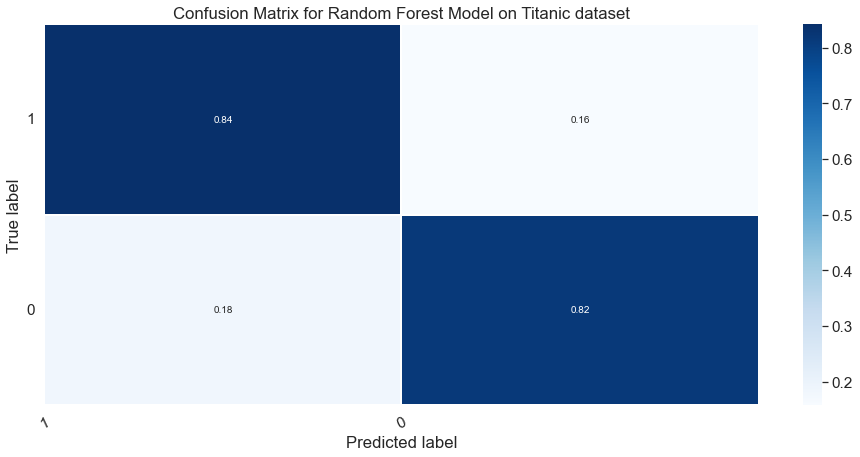

In [45]:
# autre affichage de la matrice de confusion (utile quand ona beaucoup plus d'informations)

# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test_array, y_test_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Blues, linewidths=0.2)

# Add labels to the plot
class_names = ['1','0']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model on Titanic dataset')
plt.show()

In [47]:
# maintenant que j'ai un modèle qui fonctionne, je peux l'entraîner pour prédire qui va survivre dans df_test

# je sépare X_train, X_test, y_train, y_test 
X_train2 = df_train.drop("Survived", axis = 1)
X_test2 = df_test
y_train2 = df_train["Survived"]

# je modifie les dimensions de y_train pour être conforme avec scikit-learn
X_train2_array = X_train2.to_numpy()
X_test2_array = X_test2.to_numpy()
y_train2_array = y_train2.to_numpy()

# puis j'effectue le redimensionnement
y_train2_array = y_train2_array.reshape((len(y_train2_array),1))

print("dimensions de X_train2_array :", X_train2_array.shape)
print("dimensions de X_test2_array :", X_test2_array.shape)
print("dimensions de y_train2_array :", y_train2_array.shape)

dimensions de X_train2_array : (891, 8)
dimensions de X_test2_array : (418, 8)
dimensions de y_train2_array : (891, 1)


In [48]:
# prédictions finales
ros3 = RandomOverSampler()
X_train_ros3, y_train_ros3 = ros3.fit_resample(X_train2_array, y_train2_array)

# random forest
rf3 = RandomForestClassifier(random_state = 123, criterion = "gini")
rf3.fit(X_train_ros3, y_train_ros3)
y_pred = rf3.predict(X_test2_array)

df_test["Survived"] = y_pred

In [49]:
display(df_test.head(10))

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,892,3,0,34.5,0,0,7.8292,2,0
1,893,3,1,47.0,1,0,7.0000,0,0
2,894,2,0,62.0,0,0,9.6875,2,0
3,895,3,0,27.0,0,0,8.6625,0,1
4,896,3,1,22.0,1,1,12.2875,0,0
5,897,3,0,14.0,0,0,9.2250,0,0
6,898,3,1,30.0,0,0,7.6292,2,0
7,899,2,0,26.0,1,1,29.0000,0,0
8,900,3,1,18.0,0,0,7.2292,1,1
9,901,3,0,21.0,2,0,24.1500,0,0


In [61]:
# j'affiche les variables qui étaient les plus déterminantes dans la prise de décision du modèle
feature_importances = pd.DataFrame(rf3.feature_importances_,
                                    index =X_train2.columns,  
                                    columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

             importance
Sex            0.236058
Fare           0.197852
PassengerId    0.191476
Age            0.188052
Pclass         0.074591
SibSp          0.048737
Parch          0.034385
Embarked       0.028849


In [ ]:
# les quatre variables les plus importantes dans la prise de décision du modèle étaient :
# le genre, 
# le prix du ticket, 
# l'identité du passager,
# l'âge

# mis à part pour l'identité du passager, cela correspond avec la data visualisation effectuée au début